In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from tensorflow.keras.datasets import mnist

In [21]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [22]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape


# หมายถึง: มีภาพ 60,000 รูป
# แต่ละภาพมีขนาด 28×28 (2D matrix) → 3 มิติ

# มี 60,000 label (เช่น ตัวเลข 0–9)
# เป็น เวกเตอร์ 1D เพราะแต่ละ label เป็นเพียงค่าดิจิตเดียว

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [23]:
labels = np.unique(y_train)
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [24]:
sample_size = 10000
sample_indices = np.random.randint(0,X_train.shape[0], sample_size)
X_tr = X_train[sample_indices]
y_tr = y_train[sample_indices]
X_tr.shape, y_tr.shape

((10000, 28, 28), (10000,))

# Normalize ค่า pixel ให้อยู่ในช่วง [0, 1]

In [25]:
X_tr.max(), X_tr.min() # Normalization for train set ตรวจสอบค่ามากสุด/น้อยสุดของ pixel → โดยทั่วไปจะอยู่ในช่วง 0–255

(255, 0)

In [26]:
X_tr = X_tr / X_tr.max() # หารด้วยค่าสูงสุด (255) → ทำให้ทุก pixel อยู่ในช่วง [0, 1]

In [27]:
X_tr.max() # ตรวจสอบว่าหลัง normalize แล้ว ค่าสูงสุดเป็น 1 หรือไม่ (ควรจะเป็น)

1.0

In [28]:
#  Normalization สำหรับ test set:
X_te = X_test / X_test.max()

| Layer   | Shape Input → Output | Function                |
| ------- | -------------------- | ----------------------- |
| Input   | (28, 28)             | ภาพขาวดำขนาด 28x28      |
| Flatten | (28, 28) → (784,)    | แปลงภาพเป็นเวกเตอร์     |
| Dense   | (784,) → (128,)      | Hidden layer พร้อม ReLU |
| Dense   | (128,) → (10,)       | Output softmax 10 class |


In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense

In [38]:
model = Sequential()

🔧 การสร้างโมเดลแบบ "Sequential model"

ซึ่งเป็นโมเดลที่ ประกอบด้วยชั้น (layers) เรียงลำดับกันทีละชั้น ตั้งแต่ input → output

ไม่มีโครงสร้างซับซ้อน (เช่น branch หรือ merge)

In [39]:
# ANN คืออะไร?


# ANN ไม่มีการเรียนรู้ "พื้นที่" ของภาพโดยตรง

# มัน flatten (แบน) ภาพจาก 2D → 1D ก่อนเรียนรู้

# ทำงานเหมือนกับ data ทั่วไป เช่นตารางค่าตัวเลข


# ใช้ ANN เมื่อไหร่?

# ใช้ได้กับ MNIST และ dataset ขนาดเล็ก

# เร็ว, โครงสร้างง่าย, เทรนไว

# แต่ไม่เหมาะกับภาพที่ซับซ้อน เช่น รูปถ่ายหรือภาพสี

In [40]:
input_layer = InputLayer(shape = [28,28]) # กำหนด input เป็นภาพขนาด 28x28 (เช่น MNIST)
# ไม่มี channel ชัดเจน (หรือถือว่า channel=1) ถ้าเป็น ขาวดำ (สำหรับ CNN) เพิ่ม dimension ช่องสี = 1 -> (28, 28, 1)	

flatten_layer = Flatten() # แปลง input matrix (28x28) → เวกเตอร์ 1D ขนาด 784 (28×28)
# ใช้เพื่อป้อนเข้า dense layer

hidden_layer = Dense(128, activation = tf.nn.relu) # Fully connected layer มี 128 neuron
# ใช้ ReLU เป็น activation function

output_layer = Dense(len(labels), activation = tf.nn.softmax) # Output layer ใช้ softmax → เหมาะสำหรับ multi-class classification
# len(labels) คือจำนวน class (เช่น MNIST จะเท่ากับ 10)

คำตอบสั้น:
128 เป็นจำนวน neurons ที่ "กำหนดเอง" ได้ เพื่อควบคุม ความสามารถในการเรียนรู้ ของโมเดล

เหตุผลที่นิยมใช้ 128:

เป็นขนาดที่ ไม่เล็กจนเกินไป จนเรียนรู้ pattern ไม่ได้
และก็ ไม่ใหญ่เกินไป จนใช้ทรัพยากรเยอะเกินจำเป็น
เหมาะสำหรับ ข้อมูลขนาดกลาง อย่าง MNIST (28x28 รูปภาพ)
📌 ค่าอื่นที่นิยมใช้: 32, 64, 128, 256, 512
(ขึ้นอยู่กับความซับซ้อนของงานและขนาด dataset)

✅ ยิ่ง neuron เยอะ → โมเดลอาจแม่นยำขึ้น
❗ แต่ก็เสี่ยง overfitting และเทรนช้าลง

⚡ 2. ทำไมใช้ ReLU (Rectified Linear Unit)?
activation='relu'
ReLU ยอดนิยมมากเพราะ:

ทำงานเร็ว: คำนวณง่าย (f(x) = max(0, x))
ลดปัญหา gradient หาย (vanishing gradient)
ช่วยให้โมเดลเรียนรู้ได้ดีใน deep network
📌 ใช้กับ hidden layer เท่านั้น (เช่น 128 neuron)
📌 ส่วน output layer ใช้ softmax → เพื่อ classification

In [41]:
model.add(input_layer) # เพิ่ม input layer เข้าไปในโมเดล รับภาพ 28x28 (จาก MNIST)
model.add(flatten_layer) # แปลงภาพจาก (28, 28) → เวกเตอร์ขนาด 784 เพื่อป้อนเข้า dense layer
model.add(hidden_layer) # เพิ่ม hidden layer ที่มี 128 neuron + ReLU activation ช่วยเรียนรู้ feature ที่ซับซ้อนขึ้น
model.add(output_layer) # เพิ่ม output layer ที่มี len(labels) neuron (เช่น 10 class สำหรับ MNIST)
# ใช้ softmax เพื่อแปลง output เป็นความน่าจะเป็นแต่ละ class

In [ ]:
# ทียบกับวิธีสั้น (แนะนำถ้าไม่ต้องแยก layer):
from tensorflow.keras.layers import  Input

model = Sequential([
    Input(shape=(28, 28)),  # กำหนด input shape โดยไม่ต้องใช้ InputLayer
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [42]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

ยอดเยี่ยม! ข้อมูลที่คุณเห็นคือ **สรุปโครงสร้างของโมเดล (Summary)** ซึ่งให้ข้อมูลสำคัญเกี่ยวกับ **layer ต่างๆ** และ **จำนวน parameters** ที่ใช้ในโมเดล

มาดูรายละเอียดทีละส่วน:

### 🧑‍🏫 **Layer Information:**

1. **Flatten Layer (`flatten_4`)**

   * **Output Shape:** `(None, 784)`
   * เปลี่ยนข้อมูลจากภาพ 28x28 (2D) ให้เป็นเวกเตอร์ 1 มิติขนาด 784
   * **Param #:** 0 เพราะไม่ใช่ layer ที่มีการเรียนรู้ (ไม่ต้องการพารามิเตอร์)

2. **Dense Layer (`dense_8`)**

   * **Output Shape:** `(None, 128)`
   * ใช้ 128 neurons ใน hidden layer
   * **Param #:** 100,480

     * **อธิบาย:** มีพารามิเตอร์ที่ต้องฝึก 100,480 ค่า (จากการคำนวณ `784 * 128 + 128`, เพราะมี biases ด้วย)

3. **Dense Layer (`dense_9`)**

   * **Output Shape:** `(None, 10)`
   * เป็น output layer ที่มี 10 neurons (เหมาะกับการจำแนกหมวดหมู่ 10 แบบ เช่น 0-9 สำหรับ MNIST)
   * **Param #:** 1,290

     * **อธิบาย:** มีพารามิเตอร์ที่ต้องฝึก 1,290 ค่า (จากการคำนวณ `128 * 10 + 10`)

---

### 💡 **สรุป**

* **Total Parameters:** 101,770

  * พารามิเตอร์ทั้งหมดที่ต้องฝึกในโมเดลนี้ (ใช้ในการเรียนรู้)
* **Trainable Parameters:** 101,770

  * พารามิเตอร์ทั้งหมดที่สามารถปรับได้ในระหว่างการฝึก
* **Non-trainable Parameters:** 0

  * ไม่มีพารามิเตอร์ที่ไม่สามารถปรับได้ (ทุกพารามิเตอร์สามารถปรับได้)


In [ ]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics=['accuracy']) 

# Optimizer: 'adam'
# Adam Optimizer คือ optimizer ที่มีประสิทธิภาพสูง ซึ่งเป็นที่นิยมใช้ในปัจจุบัน เนื่องจากมันคำนวณอัตราการเรียนรู้ (learning rate) ที่เหมาะสมและอัพเดตพารามิเตอร์ได้อย่างมีประสิทธิภาพ
# Loss: 'sparse_categorical_crossentropy'
# ใช้ sparse categorical cross-entropy เป็น loss function สำหรับการจำแนกประเภทหลายคลาสที่มี label เป็นตัวเลข (ไม่ต้องใช้ one-hot encoding)
# Metrics: ['accuracy']

# sparse categorical cross-entropy เป็น loss function ที่มักใช้ในงาน classification (การจำแนกประเภท) ที่มีหลายคลาส

# "sparse": หมายความว่า labels ของคุณจะเป็นตัวเลข (integer) แทนการใช้ one-hot encoding (ไม่ต้องแปลง label เป็น vector ที่มีค่า 0 หรือ 1)
# "Categorical": หมายถึงโมเดลของคุณกำลังทำการจำแนกข้อมูลที่มีหลายคลาส (หลายประเภท) เช่น 10 หมวดหมู่ (สำหรับ MNIST: 0-9)
# "Cross-Entropy": เป็นเทคนิคที่ใช้เปรียบเทียบความแตกต่างระหว่าง distribution ของผลลัพธ์ที่โมเดลทำนาย กับ distribution ของคำตอบที่ถูกต้อง (จริง)

# เรากำหนดให้ประเมินผลโดยใช้ accuracy ซึ่งจะวัดว่าโมเดลทำนายได้ถูกต้องแค่ไหน

In [ ]:
result = model.fit(X_tr, y_tr,epochs = 10)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.7431 - loss: 0.8882
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9280 - loss: 0.2516
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9524 - loss: 0.1688
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.9667 - loss: 0.1296
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.9741 - loss: 0.0947
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.9822 - loss: 0.0764
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.9887 - loss: 0.0539
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9907 - loss: 0.0420
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.9958 - loss: 0.0280
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.9964 - loss: 0.0235


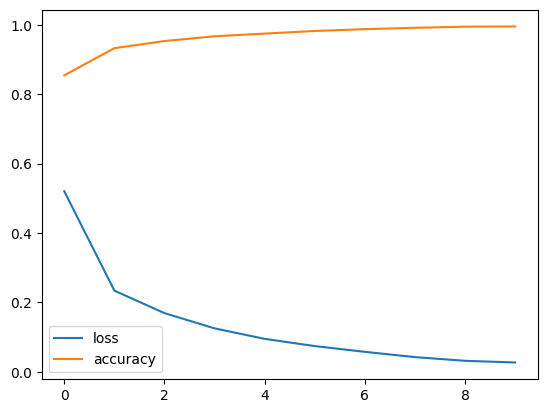

In [45]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['accuracy'],label='accuracy')
plt.legend()

In [ ]:
# ฟังก์ชัน display_digit(digit) ที่คุณเขียนขึ้นนี้จะใช้สำหรับการแสดงผลภาพของตัวเลขจากข้อมูลที่เป็น ภาพกราฟิก (เช่น ข้อมูลจากชุดข้อมูล MNIST) โดยใช้ Matplotlib เพื่อแสดงผลภาพของตัวเลขในรูปแบบของภาพขาวดำ

def display_digit(digit):
    plt.imshow(digit,cmap = 'gray', interpolation='nearest')
    
    
#     plt.imshow(digit, cmap='gray', interpolation='nearest'):
# plt.imshow(digit): ใช้สำหรับแสดงผลภาพจากตัวแปร digit ซึ่งในกรณีนี้คาดว่า digit จะเป็นข้อมูลภาพขนาด 28x28 (เช่น ในกรณีของ MNIST ที่แต่ละตัวเลขมีขนาด 28x28 พิกเซล)
# cmap='gray': การตั้งค่า cmap='gray' หมายถึงใช้โทนสีขาวดำ (grayscale) สำหรับการแสดงผลของภาพ
# interpolation='nearest': ใช้การ interpolation แบบ "nearest" ซึ่งหมายถึงการแสดงภาพโดยใช้ค่าพิกเซลที่ใกล้เคียงที่สุด (ไม่มีการเบลอภาพ) ซึ่งมักใช้ในการแสดงภาพที่เป็นค่าตัวเลขทั้งหมด (เช่น ข้อมูลจาก MNIST)

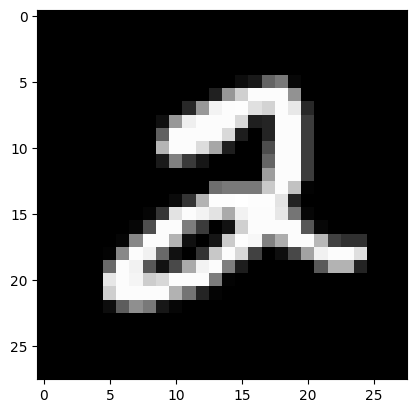

In [47]:
display_digit(X_train[5])

In [48]:
y_train[5]

2

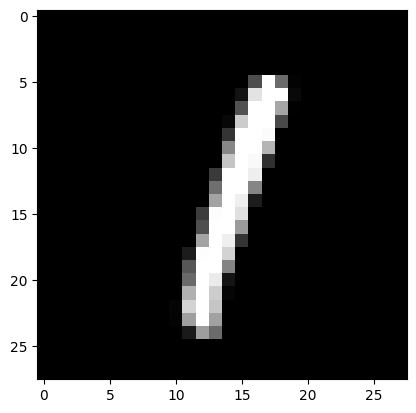

In [49]:
display_digit(X_te[5])

In [50]:
y_test[5]

1

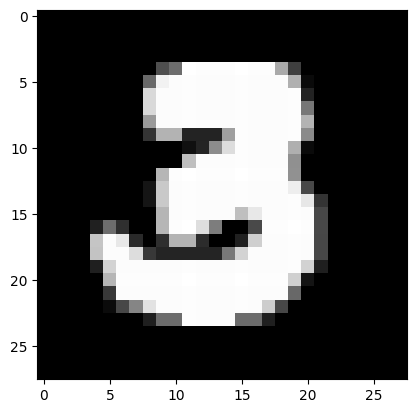

In [51]:
display_digit(X_te[200])

In [52]:
y_test[200]

3

In [53]:
pred_result = model.predict(X_te)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


In [54]:
pred_result[0]

array([3.1626671e-06, 1.5014024e-08, 2.6559190e-05, 1.3058749e-04,
       1.1739273e-09, 5.4493319e-07, 8.3019772e-12, 9.9982357e-01,
       2.5574909e-06, 1.2894055e-05], dtype=float32)

In [55]:
# คำสั่ง np.argmax(pred_result[0]) ใช้ในการหาค่าตำแหน่งของ ค่าที่สูงสุด (maximum value) ใน array หรือ list ที่ส่งไป โดยจะให้ ดัชนี (index) ของค่าที่มีค่ามากที่สุดใน array หรือ list นั้นๆ

# np.argmax(pred_result[0]): ใช้หาค่าดัชนี (index) ของค่าที่สูงที่สุดใน pred_result[0].
# ในตัวอย่างนี้ [0.1, 0.3, 0.5, 0.1], np.argmax() จะคืนค่าดัชนี 2 เพราะ 0.5 เป็นค่าที่สูงที่สุดใน array และมันอยู่ที่ index 2

# ผลลัพธ์ที่โมเดลทำนาย (probabilities ของแต่ละคลาส)
# pred_result = np.array([[0.1, 0.3, 0.5, 0.1]])

# # ค้นหาคลาสที่มีค่าความน่าจะเป็นสูงสุด
# predicted_class = np.argmax(pred_result[0])

# print(predicted_class)  # Output: 2

# ในกรณีนี้, np.argmax(pred_result[0]) จะให้ค่า 2, ซึ่งหมายความว่า คลาสที่โมเดลทำนายเป็นไปได้มากที่สุด คือคลาสที่มีค่าความน่าจะเป็นสูงสุด (ในที่นี้คือ 0.5 ซึ่งอยู่ใน index 2)

# ใช่แล้วครับ! เมื่อคุณใช้คำสั่ง np.argmax(pred_result[0]), ค่าผลลัพธ์ที่ได้จะเป็น index ของคลาสที่โมเดลทำนายว่าเป็นไปได้มากที่สุด หรือ คลาสที่มีความน่าจะเป็นสูงสุด.

np.argmax(pred_result[0])

7

In [56]:
final_result = np.argmax(pred_result,axis=1)

In [58]:
print('accuracy', np.mean(final_result == y_test))
# np.mean(final_result == y_test):
# ฟังก์ชัน np.mean() จะคำนวณค่าเฉลี่ยของ array ของค่าบูลีน (Boolean) ที่ได้จาก final_result == y_test.
# ใน Python, ค่าบูลีน True จะถูกนับเป็น 1 และ False จะถูกนับเป็น 0 ดังนั้น, ค่าเฉลี่ยจะเป็นการคำนวณเปอร์เซ็นต์ของค่าที่ True (การทำนายถูกต้อง) เมื่อเทียบกับจำนวนทั้งหมด.

accuracy 0.9549
